<a href="https://colab.research.google.com/github/boreumlee/IMDB/blob/main/%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# 데이터셋 경로
file_path = '/content/drive/MyDrive/Colab Notebooks/딥러닝 (텐서플로우, 케라스)/IMDB Dataset.csv'

# 데이터 로드
df = pd.read_csv(file_path)

# 데이터 미리 보기
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# 불필요한 태그 제거
import re

# re.sub(r'<br\s*/?>', '', 'A wonderful little production. <br /><br />The')
text = ' '.join('A wonderful little production. The'.split())  # 불필요한 공백 제거
text


'A wonderful little production. The'

In [4]:
# 불필요한 태그 제거
import re

def clean_text(text):
  text = re.sub(r'<br\s*/?>', ' ', text) # <br /> 제거
  text = re.sub(r'[^a-zA-Z]', ' ', text) # 영어 이외의 문자 제거
  text = text.lower() #소문자 변환
  text = ' '.join(text.split()) # 불필요한 공백 제거
  return text

df['cleaned_review'] = df['review'].apply(clean_text)

# 결과
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei s love in the time of money is a...


In [11]:
# 토큰화(Tokenization)
# 리뷰 텍스트를 단어 단위로 분리하고, 불용어(stopwords)("the", "is", "and", ...) 제거

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab') # 단어 및 문장 토큰화에 필요한 데이터 다운로드
nltk.download('stopwords') # 불용어 데이터 다운로드


stop_words = set(stopwords.words('english')) # 빠르게 검색하기 위해 set자료형으로 변경

def tokenize(text):
  words = word_tokenize(text) # 단어 단위로 분리
  words = [word for word in words if word not in stop_words] # 불용어 제거
  return ' '.join(words)

df['tokenized_review'] = df['cleaned_review'].apply(tokenize)

# 결과
df[['cleaned_review', 'tokenized_review']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_review,tokenized_review
0,one of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode ho...
1,a wonderful little production the filming tech...,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,basically there s a family where a little boy ...,basically family little boy jake thinks zombie...
4,petter mattei s love in the time of money is a...,petter mattei love time money visually stunnin...


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(df['tokenized_review'], df['sentiment'], test_size=0.2, random_state=42)

# TF-IDF 변환(문장을 숫자로 변환) - TF-IDF 를 이용해 중요한 단어에 가중치를 부여함.
vectorizer = TfidfVectorizer(max_features=5000) # 상위 5000개 단어만 사용
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# 예측 및 평가
y_pred = model.predict(X_test_tfidf)

# 정확도
print('정확도: ', accuracy_score(y_test, y_pred))
# 상세 평가 지표 출력
print('분류 보고서: ', classification_report(y_test, y_pred))

# 정확도:  0.8916
# 분류 보고서:                precision    recall  f1-score   support

#     negative       0.90      0.88      0.89      4961
#     positive       0.88      0.91      0.89      5039

#     accuracy                           0.89     10000
#    macro avg       0.89      0.89      0.89     10000
# weighted avg       0.89      0.89      0.89     10000

# precision(정밀도), recall(재현율), f1-score도 함께 참고하면 좋아!
# 정밀도(precision): 모델이 긍정이라고 한 리뷰 중 진짜 긍정인 비율
# 재현율(recall): 실제 긍정 리뷰 중에서 모델이 맞춘 비율



정확도:  0.8916
분류 보고서:                precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



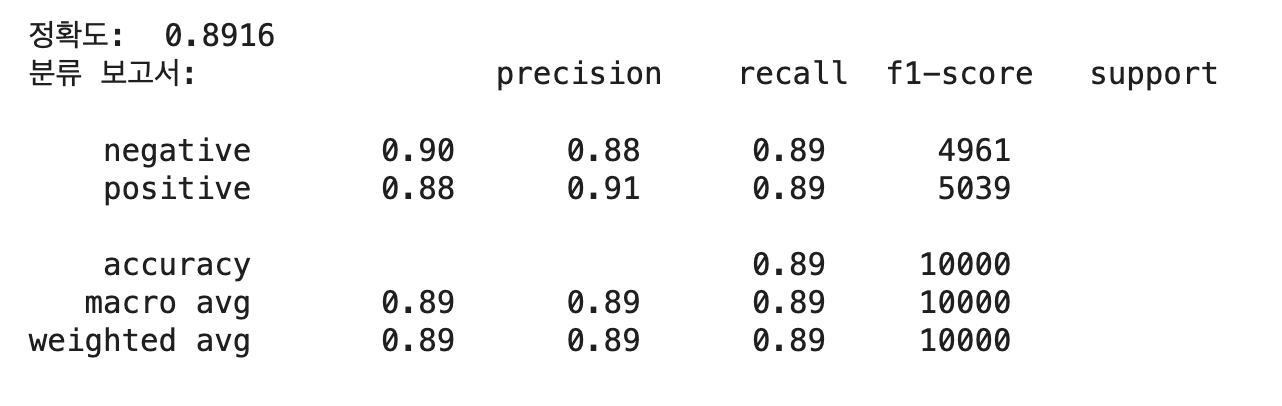

### 1️⃣ TF-IDF 대신 Word2Vec 사용해보기 (딥러닝 기반 임베딩)
 - TF-IDF는 단어 빈도를 기반으로 하지만, 단어 간의 의미를 반영하지 않음
 - Word2Vec이나 FastText 같은 워드 임베딩 모델을 사용하면 더 좋은 성능이 나올 수도 있음

### 2️⃣ 머신러닝 모델 변경
 - 지금은 Logistic Regression을 썼는데, -> 랜덤 포레스트(Random Forest)나 XGBoost 같은 모델을 적용하면 더 좋은 성능이 나올 수도 있음

### 3️⃣ 딥러닝 모델 (LSTM) 적용
 - 감성 분석은 LSTM(Long Short-Term Memory) 같은 RNN 모델이 잘 맞음
 - 텍스트의 순서를 반영하는 LSTM을 사용하면 성능이 더 좋아질 수도 있음



In [13]:
# word2Vec으로 변경
# Word2Vec은 단어를 벡터(숫자)로 변환하는 방법

# TF-IDF는 단어 빈도 기반이라 문맥을 반영 못함
# Word2Vec은 단어의 의미(유사도) 를 벡터화해서 반영 가능

# "king - man + woman ≈ queen" 같은 연산이 가능

# Gensim 라이브러리fh Word2Vec 단어 벡터 생성
from gensim.models import Word2Vec

df['tokenized_review'] = df['cleaned_review'].apply(nltk.word_tokenize)


KeyError: 'tokenize_review'

In [15]:
# Word2Vec 모델 학습

word2Vec_model = Word2Vec(sentences=df['tokenized_review'], vector_size=100, window=5, min_count=2, workers=4)

# vector_size=100 → 단어 벡터 차원 100
# window=5 → 앞뒤 5개 단어까지 고려
# min_count=2 → 2번 이상 나온 단어만 학습
# workers=4 → 병렬 처리
word2Vec_model.save('word2vec.model') # 모델 저장

In [16]:
# 단어 벡터로 변환

def get_sentence_vector(words, model):
  vectors = [model.wv[word] for word in words if word in model.wv]
  return np.mean(vectors, axis=0) if vectors else np.zeros(100) # 평균 벡터

df['vectorized_review'] = df['tokenized_review'].apply(lambda x: get_sentence_vector(x, word2Vec_model))

# 리뷰 문장의 단어들을 평균 벡터로 변환
# 단어가 Word2Vec 모델에 없으면 np.zeros(100) 로 처리
# 결과적으로, 각 리뷰는 100차원 벡터가 됨


In [18]:
X = np.vstack(df['vectorized_review']) # 벡터 데이터를 numpy 배열로 변환
y = df['sentiment'].map({'positive': 1, 'negative': 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 정확도
print('정확도: ', accuracy_score(y_test, y_pred))
# 상세 평가 지표 출력
print('분류 보고서: ', classification_report(y_test, y_pred))


정확도:  0.8479
분류 보고서:                precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.84      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### Word2Vec 적용 후 정확도

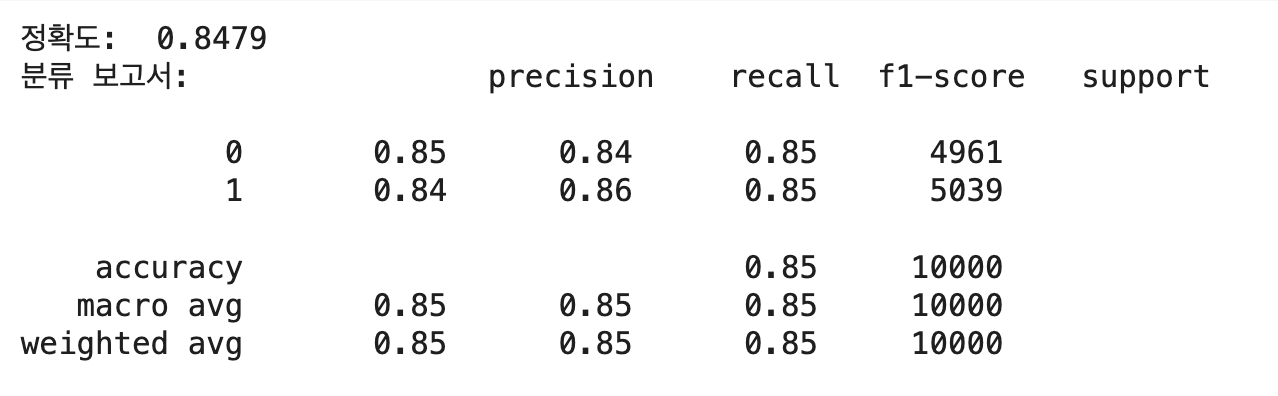

## 왜 성능이 떨어졌을까?
### 1️⃣ Word2Vec 모델 훈련 데이터 부족
 - Word2Vec은 방대한 데이터가 필요함 (Google News Corpus 같은 거대한 말뭉치)
 - 우리가 학습한 데이터셋이 부족해서 단어 벡터가 제대로 훈련되지 않았을 가능성

### 2️⃣ Word Embedding이 충분히 의미를 반영하지 못함
 - 현재 vector_size=100 설정으로 벡터를 생성했지만, 단어 간 관계를 충분히 학습하지 못했을 수도 있음
 - 특히 min_count=2 때문에 드문 단어들은 학습되지 않았을 수도 있음

### 3️⃣ 단순 평균 방식의 한계
 - get_sentence_vector()에서 단어 벡터의 평균을 사용했음
 - 하지만 단어마다 중요도가 다를 수 있는데 이를 반영하지 않음
 - 예를 들어, "not" 같은 부정 단어의 의미를 무시하고 평균값을 냄

In [1]:
!git clone https://github.com/boreumlee/IMDB.git

Cloning into 'IMDB'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
